# CUSTOMER DATA ANALYTICS

This is an analytics project based on a kaggle customer dataset. This project was completed with the assistance of the Internet, Google, and ChatGPT.

To begin, I asked ChatGPT what the most essential question for this project was. And it generates a slew of questions for me to consider.

## Data Collection and Quality:
- How was the data collected?
- What is the source of the data?
- Is the data complete, accurate, and up-to-date?
- Are there any missing values or outliers?

### How was the data collected?

The owner said `It was collected through 1 year long research about local shop customers`.

### Source of the data
dataset is retrived from kaggle [data](https://www.kaggle.com/datasets/datascientistanna/customers-dataset)

### Is the data complete, accurate, and up-to-date?
The information was gathered from 2000 consumers of a local shop over the course of a year.

### Are there any missing values or outliers?


In [29]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objs as go

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering

from matplotlib import colors
from matplotlib.colors import ListedColormap


In [2]:
PATH = 'Customers.csv'
df = pd.read_csv(PATH)
df.head(5)

CustomerID  Gender  Age  Annual Income ($)  Spending Score (1-100)  \
0           1    Male   19              15000                      39   
1           2    Male   21              35000                      81   
2           3  Female   20              86000                       6   
3           4  Female   23              59000                      77   
4           5  Female   31              38000                      40   

      Profession  Work Experience  Family Size  
0     Healthcare                1            4  
1       Engineer                3            3  
2       Engineer                1            1  
3         Lawyer                0            2  
4  Entertainment                2            6

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              2000 non-null   int64 
 1   Gender                  2000 non-null   object
 2   Age                     2000 non-null   int64 
 3   Annual Income ($)       2000 non-null   int64 
 4   Spending Score (1-100)  2000 non-null   int64 
 5   Profession              1965 non-null   object
 6   Work Experience         2000 non-null   int64 
 7   Family Size             2000 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 125.1+ KB


There is one feature with 35 NULL data. Perhaps the consumer does not want to reveal what they do for a living, or perhaps the customer does not have a job at the time.

In [4]:
df['Profession'].value_counts()

Profession
Artist           612
Healthcare       339
Entertainment    234
Engineer         179
Doctor           161
Executive        153
Lawyer           142
Marketing         85
Homemaker         60
Name: count, dtype: int64

Let us replace the NULL value of the 'Profession' features with the mode value of it.

In [5]:
profession_mode_values = df['Profession'].mode().iloc[0]
profession_mode_values

df['Profession']= df['Profession'].fillna(profession_mode_values)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              2000 non-null   int64 
 1   Gender                  2000 non-null   object
 2   Age                     2000 non-null   int64 
 3   Annual Income ($)       2000 non-null   int64 
 4   Spending Score (1-100)  2000 non-null   int64 
 5   Profession              2000 non-null   object
 6   Work Experience         2000 non-null   int64 
 7   Family Size             2000 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 125.1+ KB


In [6]:
df.loc[df['Profession'].isnull()]

Empty DataFrame
Columns: [CustomerID, Gender, Age, Annual Income ($), Spending Score (1-100), Profession, Work Experience, Family Size]
Index: []

## Customer Demographics:
- What are the key demographic attributes of the customers (age, gender, location, etc.)?
- Are there any patterns or trends in the demographics of your customer base?

<BarContainer object of 100 artists>

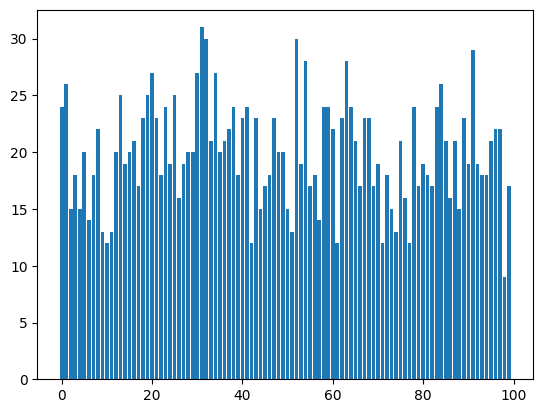

In [7]:
age_demographic = pd.DataFrame(df['Age'].value_counts()).sort_values(['Age']).reset_index()
plt.bar(age_demographic['Age'], age_demographic['count'])

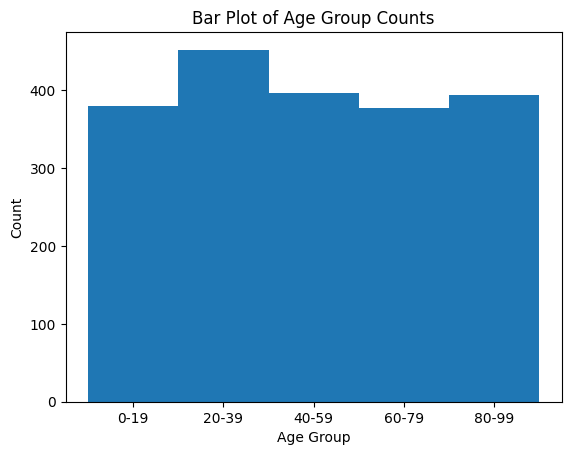

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# data = {'Age': [25, 32, 45, 28, 37, 40, 22, 55, 60, 29, 33, 41, 50, 62, 27, 38]}
# df = pd.DataFrame(data)

age_bins = [0, 20, 40, 60, 80, 100]
age_labels = ['0-19','20-39', '40-59', '60-79', '80-99']
df['Age Group'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=False)

age_group_counts = df['Age Group'].value_counts().reset_index()
age_group_counts.columns = ['Age Group', 'Count']
age_group_counts = age_group_counts.sort_values(by='Age Group')

plt.bar(age_group_counts['Age Group'], age_group_counts['Count'], width=1)
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.title('Bar Plot of Age Group Counts')
plt.show()


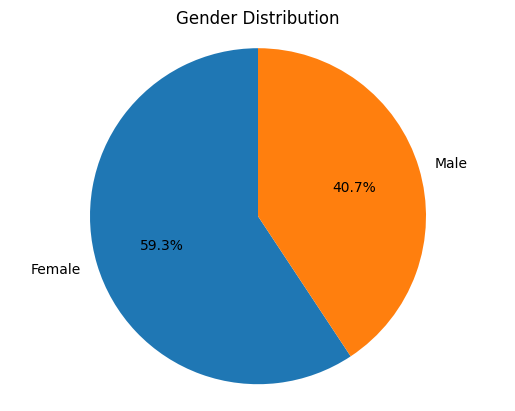

In [9]:
# Gender 
gender_counts = df['Gender'].value_counts()

plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Gender Distribution')
plt.axis('equal')
plt.show()

The female to male ratio was 59:41. We need to know if or not the distribution of genders affects other features. Consider the terms `Annual Income`, `Age Group`, `Spending Score`, or `Profession`.

1. Let's see effect of gender

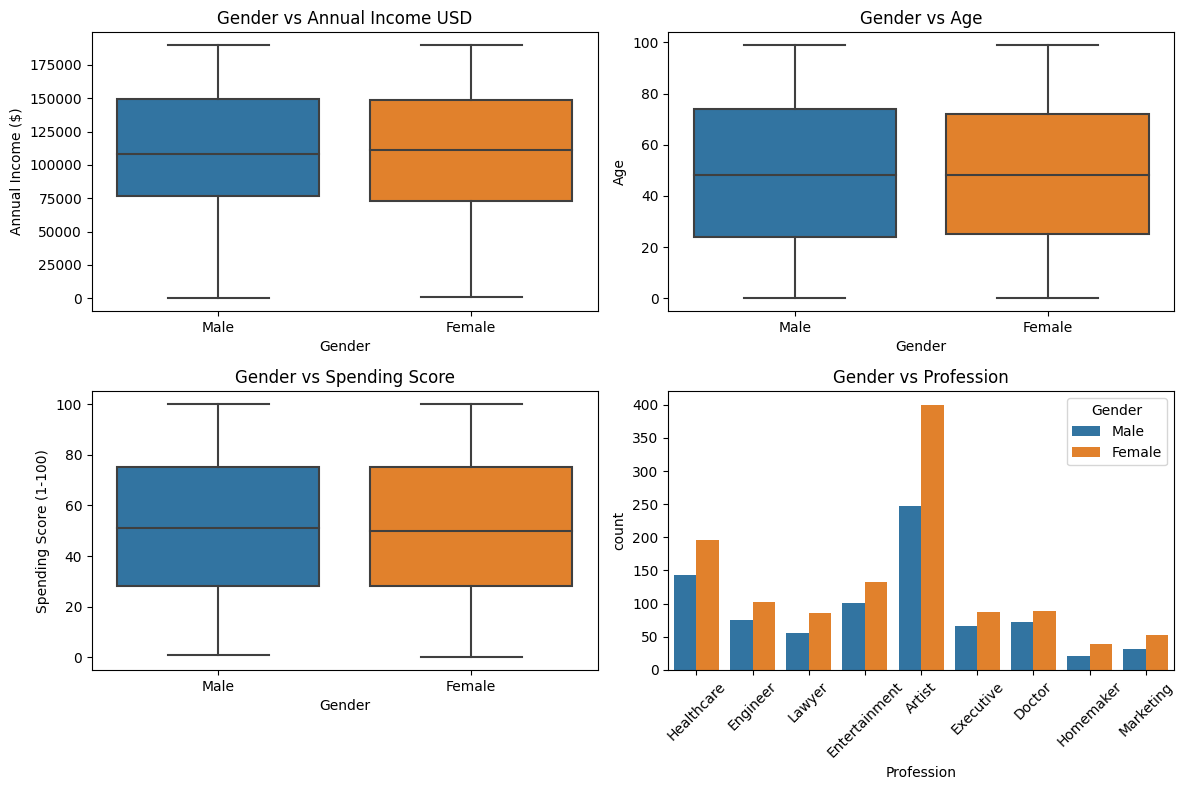

In [10]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.title("Gender vs Annual Income USD")
sns.boxplot(x='Gender', y='Annual Income ($)', data=df)

plt.subplot(2, 2, 2)
plt.title("Gender vs Age")
sns.boxplot(x='Gender', y='Age', data=df)

plt.subplot(2, 2, 3)
plt.title("Gender vs Spending Score")
sns.boxplot(x='Gender', y='Spending Score (1-100)', data=df)

plt.subplot(2, 2, 4)
plt.xticks(rotation=45)
plt.title("Gender vs Profession")
sns.countplot(x='Profession', hue='Gender', data=df)

# Adjusting layout
plt.tight_layout()

# Display the plots
plt.show()

Gender had little effect on Age, Spending Score, and Annual Income, according to the visualization. However, it has a minor impact on two female-dominated professions: artist and homemaker. 

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   CustomerID              2000 non-null   int64   
 1   Gender                  2000 non-null   object  
 2   Age                     2000 non-null   int64   
 3   Annual Income ($)       2000 non-null   int64   
 4   Spending Score (1-100)  2000 non-null   int64   
 5   Profession              2000 non-null   object  
 6   Work Experience         2000 non-null   int64   
 7   Family Size             2000 non-null   int64   
 8   Age Group               2000 non-null   category
dtypes: category(1), int64(6), object(2)
memory usage: 127.3+ KB


2. Let's see effect of Age 

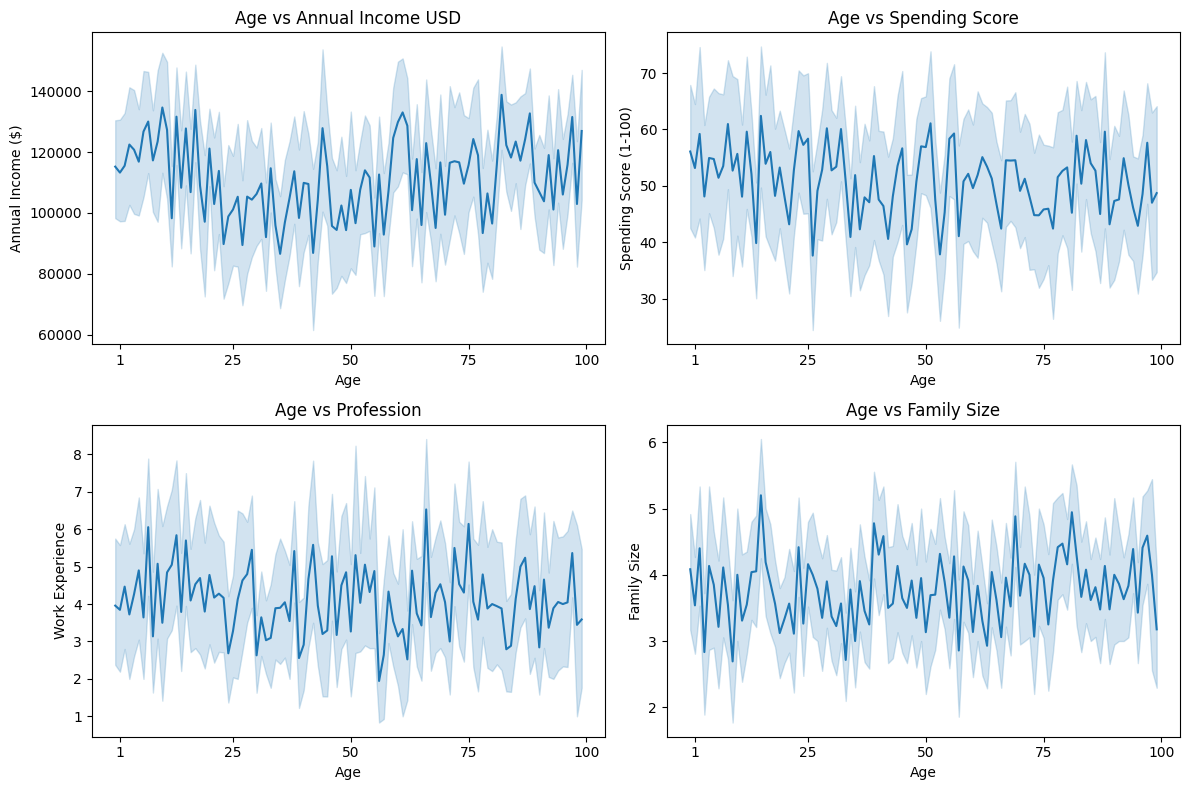

In [12]:
plt.figure(figsize=(12, 8))



plt.subplot(2, 2, 1)
plt.title("Age vs Annual Income USD")
sns.lineplot(x='Age', y='Annual Income ($)', data=df)
custom_ticks = [1, 25, 50, 75, 100]
plt.xticks(ticks=custom_ticks, labels=custom_ticks)


plt.subplot(2, 2, 2)
plt.title("Age vs Spending Score")
sns.lineplot(x='Age', y='Spending Score (1-100)', data=df)
custom_ticks = [1, 25, 50, 75, 100]
plt.xticks(ticks=custom_ticks, labels=custom_ticks)

plt.subplot(2, 2, 3)
plt.title("Age vs Profession")
sns.lineplot(x='Age', y='Work Experience', data=df)
custom_ticks = [1, 25, 50, 75, 100]
plt.xticks(ticks=custom_ticks, labels=custom_ticks)

plt.subplot(2, 2, 4)
plt.title("Age vs Family Size")
sns.lineplot(x='Age', y='Family Size', data=df)
custom_ticks = [1, 25, 50, 75, 100]
plt.xticks(ticks=custom_ticks, labels=custom_ticks)

# Adjusting layout
plt.tight_layout()

# Display the plots
plt.show()

I believe there is an error in this age data because it makes no sense if a toddler has work experience and an annual income.

The more I look at it, the less it makes sense to me. So I believe I will simply **remove stuff that is less than 25 years** old. Because I believe that is more logical. 

In [13]:
df_new = df.loc[df['Age'] > 24].reset_index(drop=True)
df_new.head()

CustomerID  Gender  Age  Annual Income ($)  Spending Score (1-100)  \
0           5  Female   31              38000                      40   
1           7  Female   35              31000                       6   
2           9    Male   64              97000                       3   
3          10  Female   30              98000                      72   
4          11    Male   67               7000                      14   

      Profession  Work Experience  Family Size Age Group  
0  Entertainment                2            6     20-39  
1     Healthcare                1            3     20-39  
2       Engineer                0            3     60-79  
3         Artist                1            4     20-39  
4       Engineer                1            3     60-79

Okay, I guess this makes more sense. So, using this data, I'll create a segmentation utilizing unsupervised learning to identify the customers who are more likely to spend a lot of money at that store. 

Let us examine the data correlation between attributes using a heatmap.



c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


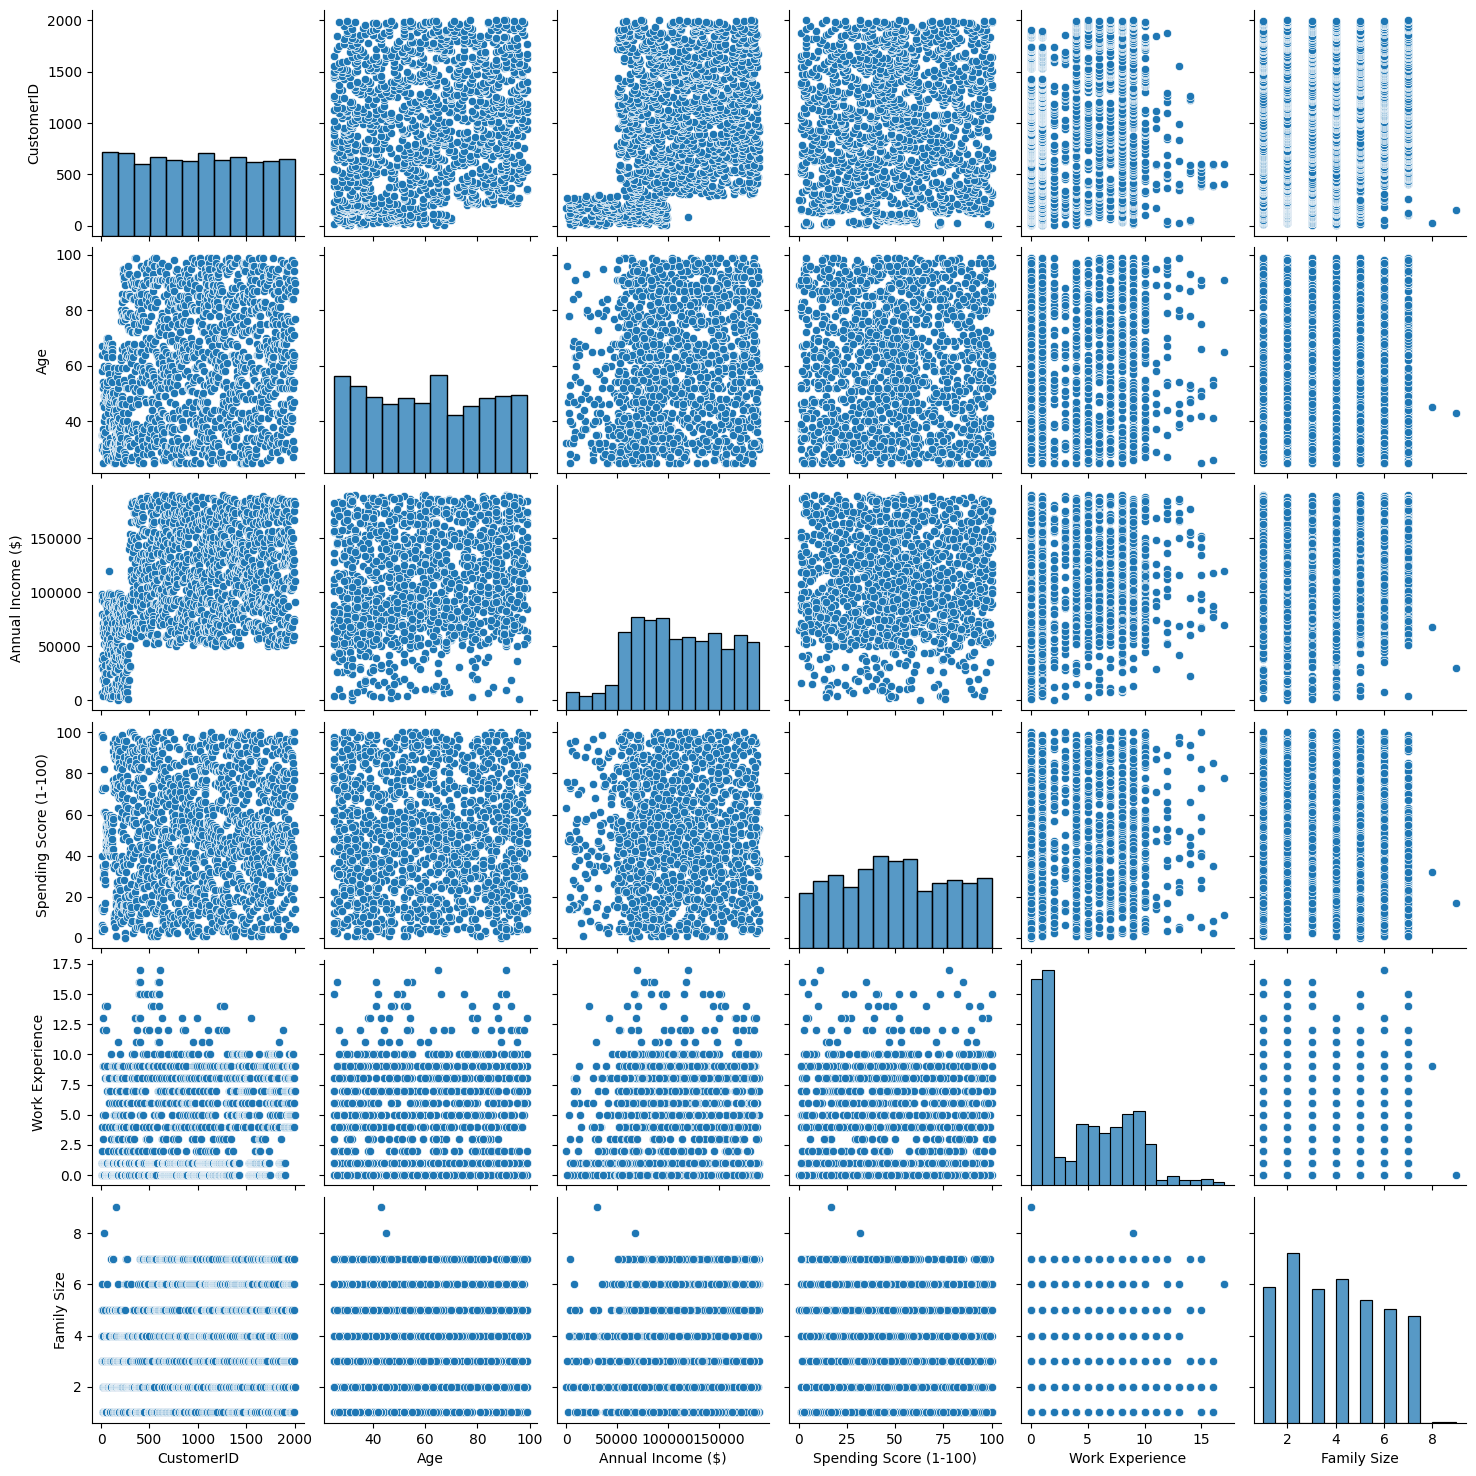

In [14]:
sns.pairplot(df_new)

<Axes: >

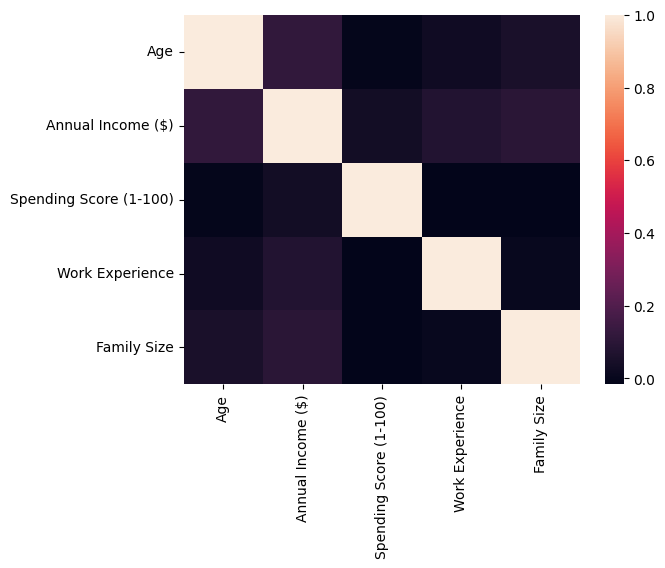

In [15]:
corr_df = df_new.drop(['CustomerID', 'Profession', 'Gender', 'Age Group'], axis=1).corr()
sns.heatmap(corr_df)

In [16]:
corr_df

Age  Annual Income ($)  Spending Score (1-100)  \
Age                     1.000000           0.114537               -0.007737   
Annual Income ($)       0.114537           1.000000                0.031569   
Spending Score (1-100) -0.007737           0.031569                1.000000   
Work Experience         0.024484           0.075542               -0.016686   
Family Size             0.054609           0.094913               -0.013965   

                        Work Experience  Family Size  
Age                            0.024484     0.054609  
Annual Income ($)              0.075542     0.094913  
Spending Score (1-100)        -0.016686    -0.013965  
Work Experience                1.000000     0.005246  
Family Size                    0.005246     1.000000

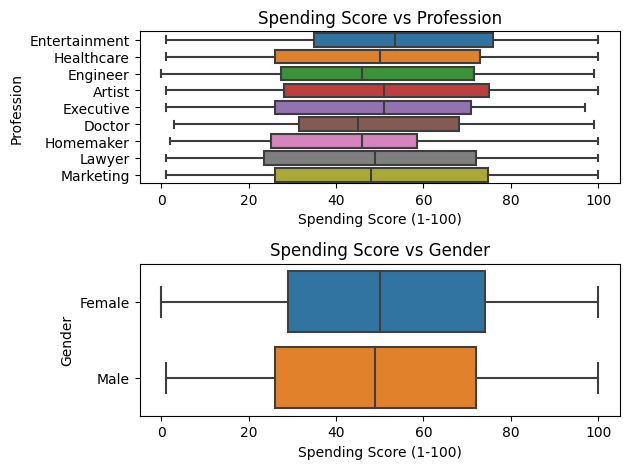

In [17]:
plt.subplot(2,1,1)
plt.title("Spending Score vs Profession")
sns.boxplot(x='Spending Score (1-100)', y='Profession', data=df_new)

plt.subplot(2,1,2)
plt.title("Spending Score vs Gender")
sns.boxplot(x='Spending Score (1-100)', y='Gender', data=df_new)

# Adjusting layout
plt.tight_layout()

# Display the plots
plt.show()


Let's use Kmeans to cluster this consumer. 
Thanks to this [article](https://www.kaggle.com/code/karnikakapoor/customer-segmentation-clustering) from kaggle for providing a fantastic example of clustering.

Clustering in steps
1. Labeling categorical features as numerical using Scikit-Learn's LabelEncoder
2. Using StandardScaler to scale all features
3. Using PCA analysis, reduce the dimensionality of features to make classifiers easier to work with.
4. Count the number of clusters using the elbow approach.
5. Using Agglomerative Clustering to Cluster
6. Examine the outcome

In [18]:
df_new.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1509 entries, 0 to 1508
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   CustomerID              1509 non-null   int64   
 1   Gender                  1509 non-null   object  
 2   Age                     1509 non-null   int64   
 3   Annual Income ($)       1509 non-null   int64   
 4   Spending Score (1-100)  1509 non-null   int64   
 5   Profession              1509 non-null   object  
 6   Work Experience         1509 non-null   int64   
 7   Family Size             1509 non-null   int64   
 8   Age Group               1509 non-null   category
dtypes: category(1), int64(6), object(2)
memory usage: 96.1+ KB


Labelling Categorical Feature using `LabelEncoder`

In [19]:
cat_features = ['Gender', 'Profession']
num_features = ['Age', 'Annual Income ($)', 'Spending Score (1-100)', 'Work Experience', 'Family Size']
data = df_new.copy()
data = data.drop(['CustomerID', 'Age Group'], axis=1)
data['Gender']

LE = LabelEncoder()
for feature in cat_features:
    data[feature] = data[[feature]].apply(LE.fit_transform)

data

Gender  Age  Annual Income ($)  Spending Score (1-100)  Profession  \
0          0   31              38000                      40           3   
1          0   35              31000                       6           5   
2          1   64              97000                       3           2   
3          0   30              98000                      72           0   
4          1   67               7000                      14           2   
...      ...  ...                ...                     ...         ...   
1504       0   71             184387                      40           0   
1505       0   91              73158                      32           1   
1506       1   87              90961                      14           5   
1507       1   77             182109                       4           4   
1508       1   90             110610                      52           3   

      Work Experience  Family Size  
0                   2            6  
1                   1            3  
2                   0            3  
3                   1            4  
4                   1            3  
...               ...          ...  
1504                8            7  
1505                7            7  
1506                9            2  
1507                7            2  
1508                5            2  

[1509 rows x 7 columns]

Scaling Feature using `Standard Scaller`

In [20]:
ds = data.copy()

SS = StandardScaler()
SS.fit(ds)

data_scaled = pd.DataFrame(SS.transform(ds), columns=ds.columns)
data_scaled

Gender       Age  Annual Income ($)  Spending Score (1-100)  \
0    -0.819205 -1.365511          -1.559202               -0.369026   
1    -0.819205 -1.182485          -1.712094               -1.600377   
2     1.220696  0.144456          -0.270540               -1.709025   
3    -0.819205 -1.411268          -0.248698                0.789892   
4     1.220696  0.281726          -2.236296               -1.310647   
...        ...       ...                ...                     ...   
1504 -0.819205  0.464752           1.638144               -0.369026   
1505 -0.819205  1.379884          -0.791290               -0.658756   
1506  1.220696  1.196858          -0.402442               -1.310647   
1507  1.220696  0.739292           1.588389               -1.672809   
1508  1.220696  1.334127           0.026726                0.065568   

      Profession  Work Experience  Family Size  
0       0.100556        -0.523717     1.133552  
1       0.892924        -0.783339    -0.398723  
2      -0.295629        -1.042961    -0.398723  
3      -1.087997        -0.783339     0.112035  
4      -0.295629        -0.783339    -0.398723  
...          ...              ...          ...  
1504   -1.087997         1.034014     1.644311  
1505   -0.691813         0.774392     1.644311  
1506    0.892924         1.293636    -0.909482  
1507    0.496740         0.774392    -0.909482  
1508    0.100556         0.255149    -0.909482  

[1509 rows x 7 columns]

Reduce Dimension

In [21]:
pca = PCA(n_components=3)
pca.fit(data_scaled)
PCA_ds = pd.DataFrame(pca.transform(data_scaled), columns=(["col1","col2", "col3"]))
PCA_ds.describe().T

count          mean       std       min       25%       50%       75%  \
col1  1509.0 -3.766960e-17  1.098874 -2.751048 -0.788180 -0.033533  0.784343   
col2  1509.0  5.179569e-17  1.028233 -2.693247 -0.716457 -0.052378  0.740885   
col3  1509.0  3.296090e-17  1.000625 -2.935386 -0.685524 -0.046129  0.700426   

           max  
col1  2.984885  
col2  3.383958  
col3  3.032217

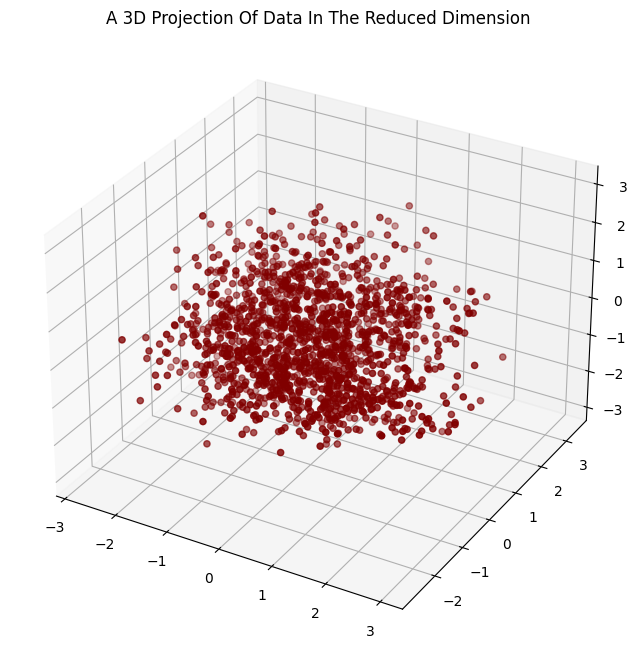

In [22]:
#A 3D Projection Of Data In The Reduced Dimension
x =PCA_ds["col1"]
y =PCA_ds["col2"]
z =PCA_ds["col3"]
#To plot
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x,y,z, c="maroon", marker="o" )
ax.set_title("A 3D Projection Of Data In The Reduced Dimension")
plt.show()

Elbow Method to determine the number of clusters to be formed:


c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\

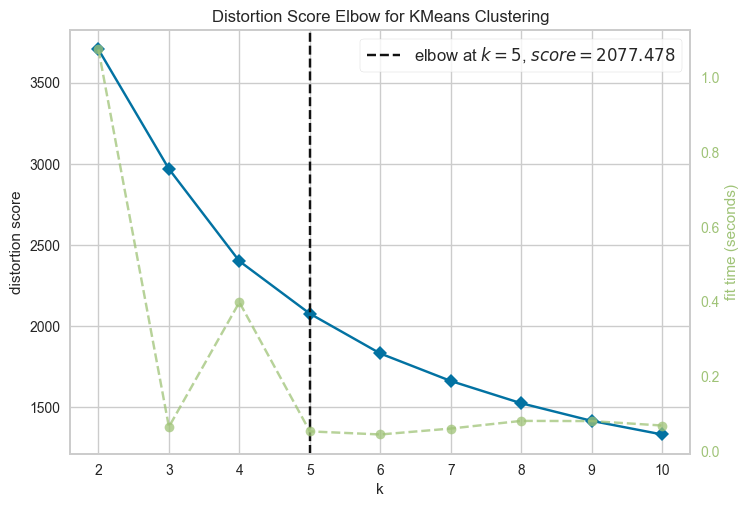

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [24]:
# Quick examination of elbow method to find numbers of clusters to make.
print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(PCA_ds)
Elbow_M.show()

In [66]:
# create a list to store the silhouette scores for each k
from sklearn.metrics import silhouette_score
silhouette_scores = []

# fit KMeans clustering with different values of k
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(data)
    silhouette_avg = silhouette_score(data, kmeans.labels_)
    silhouette_scores.append(silhouette_avg)

# find the k with the highest silhouette score
best_k = np.argmax(silhouette_scores) + 2

# plot the silhouette scores vs k
fig = px.line(x=range(2, 11), y=silhouette_scores, title='Silhouette Method')
fig.update_layout(xaxis_title='Number of Clusters (k)', yaxis_title='Silhouette Score')
fig.add_vline(x=best_k, line_dash='dash', line_color='red', annotation_text=f'Best k: {best_k}')
fig.show()

c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\

In [102]:
#Initiating the Agglomerative Clustering model
def generate_random_palette(num_colors):
    colors = []
    for _ in range(num_colors):
        # Generate a random RGB color
        red = random.random()
        green = random.random()
        blue = random.random()
        
        # Convert RGB to hexadecimal
        hex_color = "#{:02X}{:02X}{:02X}".format(int(red * 255), int(green * 255), int(blue * 255))
        colors.append(hex_color)
    
    return colors

num_colors = 3  # Number of random colors in the palette
random_palette = generate_random_palette(num_colors)
random_palette 
AC = AgglomerativeClustering(n_clusters=num_colors)
# fit model and predict clusters
yhat_AC = AC.fit_predict(PCA_ds)
PCA_ds["Clusters"] = yhat_AC
#Adding the Clusters feature to the orignal dataframe.
data["Clusters"]= yhat_AC

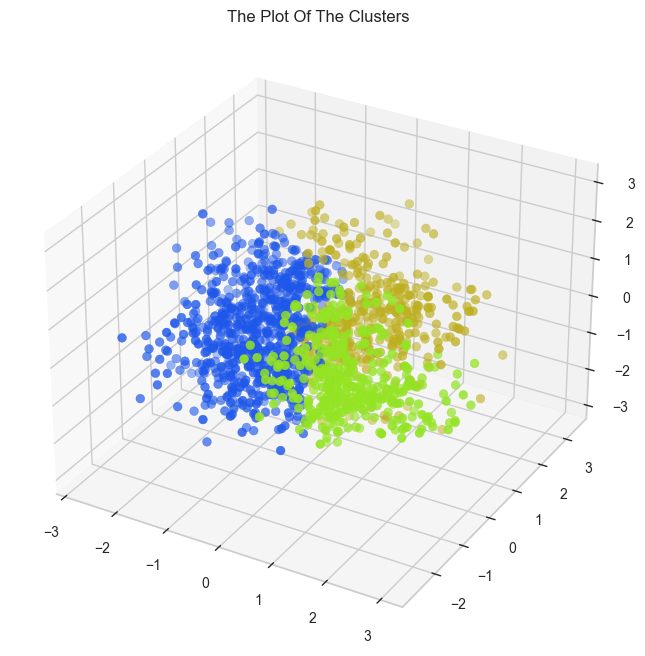

In [103]:
#Plotting the clusters
cmap = colors.ListedColormap(["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"])
cmap = colors.ListedColormap(random_palette)
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, z, s=40, c=PCA_ds["Clusters"], marker='o', cmap = cmap )
ax.set_title("The Plot Of The Clusters")
plt.show()

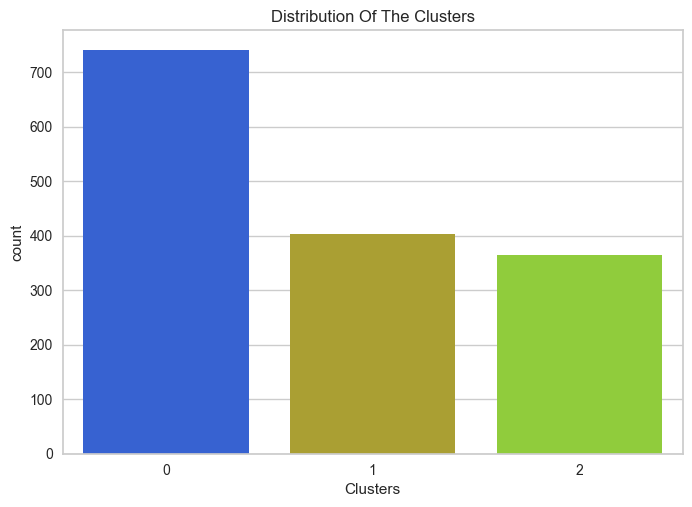

In [104]:
#Plotting countplot of clusters
pal = random_palette
pl = sns.countplot(x=data["Clusters"], palette= pal)
pl.set_title("Distribution Of The Clusters")
plt.show()

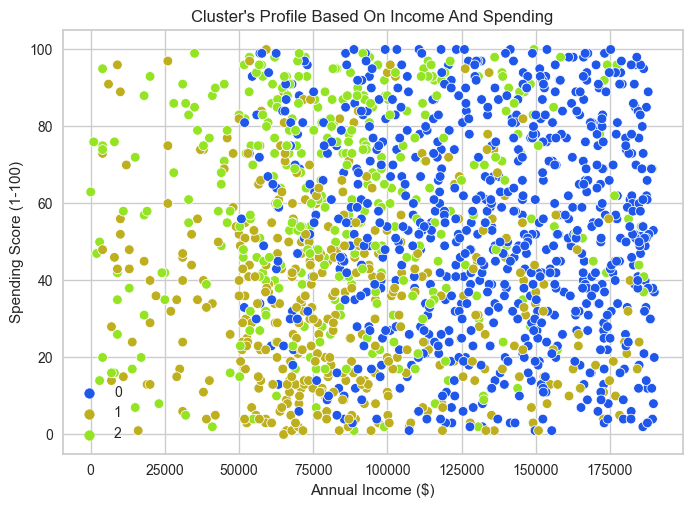

In [105]:
pl = sns.scatterplot(data = data,y=data["Spending Score (1-100)"], x=data["Annual Income ($)"],hue=data["Clusters"], palette= pal)
pl.set_title("Cluster's Profile Based On Income And Spending")
plt.legend()
plt.show()

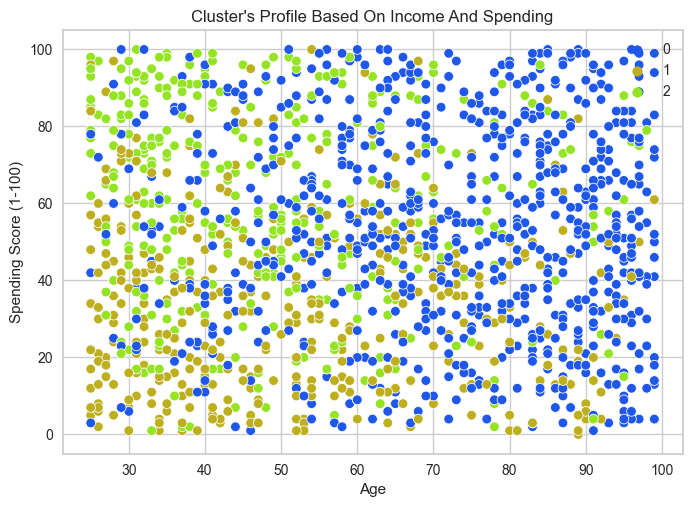

In [106]:
pl = sns.scatterplot(data = data,x=data["Age"], y=data["Spending Score (1-100)"],hue=data["Clusters"], palette= pal)
pl.set_title("Cluster's Profile Based On Income And Spending")
plt.legend()
plt.show()

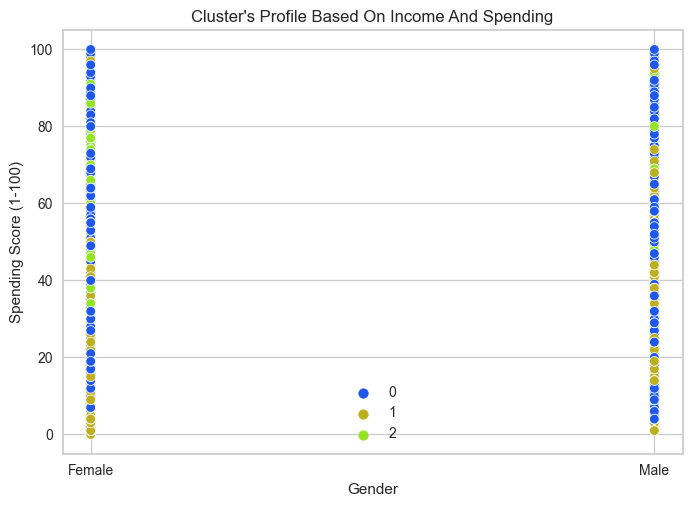

In [107]:
pl = sns.scatterplot(data = data,x=data["Gender"], y=data["Spending Score (1-100)"],hue=data["Clusters"], palette= pal)
pl.set_title("Cluster's Profile Based On Income And Spending")
plt.legend()
plt.xticks([0,1], ['Female', 'Male'])
plt.show()

In [108]:
LE.classes_

array(['Artist', 'Doctor', 'Engineer', 'Entertainment', 'Executive',
       'Healthcare', 'Homemaker', 'Lawyer', 'Marketing'], dtype=object)

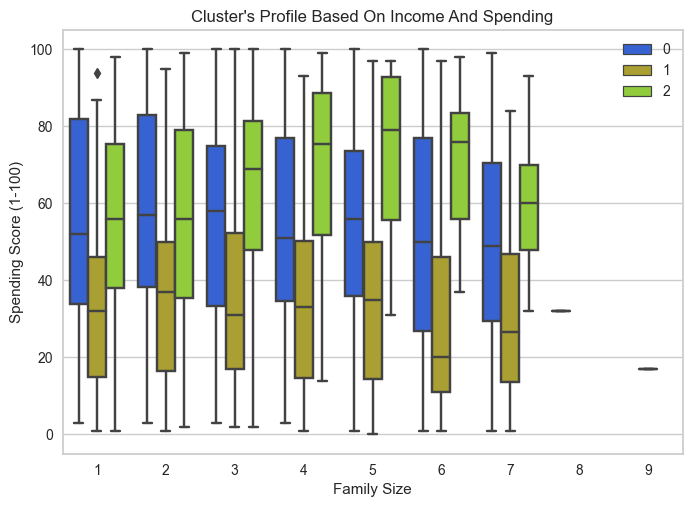

In [109]:
pl = sns.boxplot(data = data,x=data["Family Size"], y=data["Spending Score (1-100)"],hue=data["Clusters"], palette= pal)
pl.set_title("Cluster's Profile Based On Income And Spending")
plt.legend()
plt.show()

In [110]:
labels =LE.classes_

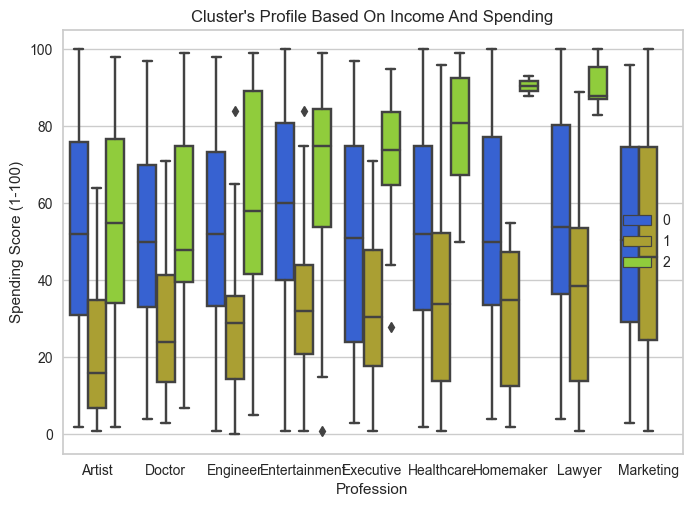

In [111]:
pl = sns.boxplot(data = data,x=data["Profession"], y=data["Spending Score (1-100)"],hue=data["Clusters"], palette= pal)
pl.set_title("Cluster's Profile Based On Income And Spending")
plt.xticks([0, 1,2,3,4,5,6,7,8], labels)
plt.legend()
plt.show()

In [47]:
import matplotlib.colors as mcolors
import random

def generate_random_palette(num_colors):
    colors = []
    for _ in range(num_colors):
        # Generate a random RGB color
        red = random.random()
        green = random.random()
        blue = random.random()
        
        # Convert RGB to hexadecimal
        hex_color = "#{:02X}{:02X}{:02X}".format(int(red * 255), int(green * 255), int(blue * 255))
        colors.append(hex_color)
    
    return colors

num_colors = 9  # Number of random colors in the palette
random_palette = generate_random_palette(num_colors)
random_palette

['#4EC20D',
 '#5057E5',
 '#72549A',
 '#11D32E',
 '#CA034A',
 '#1E4F15',
 '#C6F0F5',
 '#2564C1',
 '#DF5BF4']

In [ ]:
pl = sns.scatterplot(data = data,x=data["Age"], y=data["Spending Score (1-100)"],hue=data["Clusters"], palette= pal)
pl.set_title("Cluster's Profile Based On Income And Spending")
plt.legend()
plt.show()

In [53]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1509 entries, 0 to 1508
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Gender                  1509 non-null   int32
 1   Age                     1509 non-null   int64
 2   Annual Income ($)       1509 non-null   int64
 3   Spending Score (1-100)  1509 non-null   int64
 4   Profession              1509 non-null   int32
 5   Work Experience         1509 non-null   int64
 6   Family Size             1509 non-null   int64
 7   Clusters                1509 non-null   int64
dtypes: int32(2), int64(6)
memory usage: 82.7 KB


<Figure size 800x550 with 0 Axes>

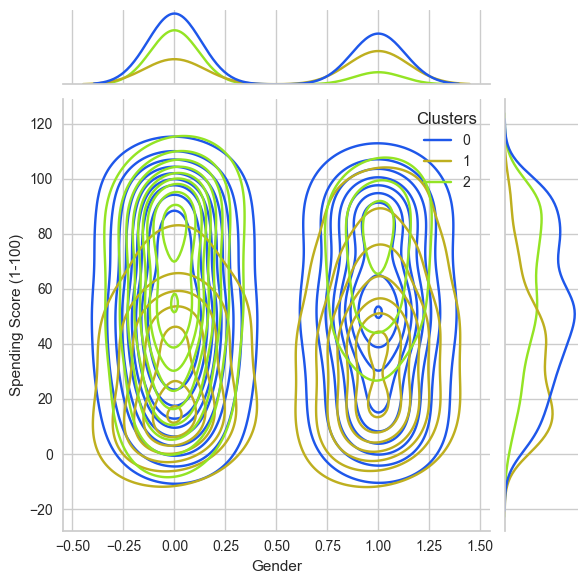

<Figure size 800x550 with 0 Axes>

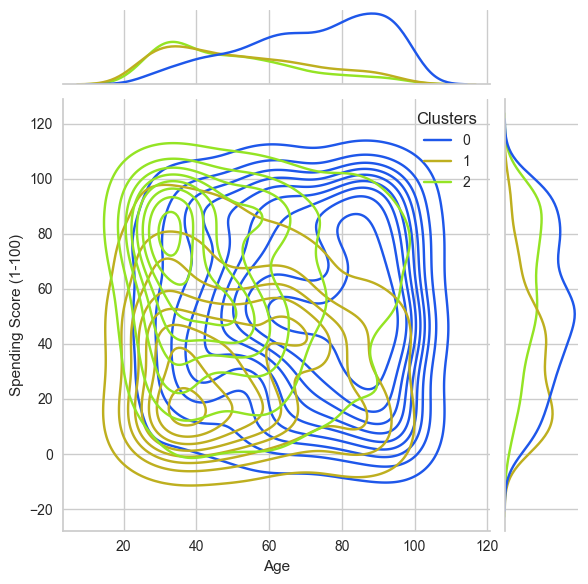

<Figure size 800x550 with 0 Axes>

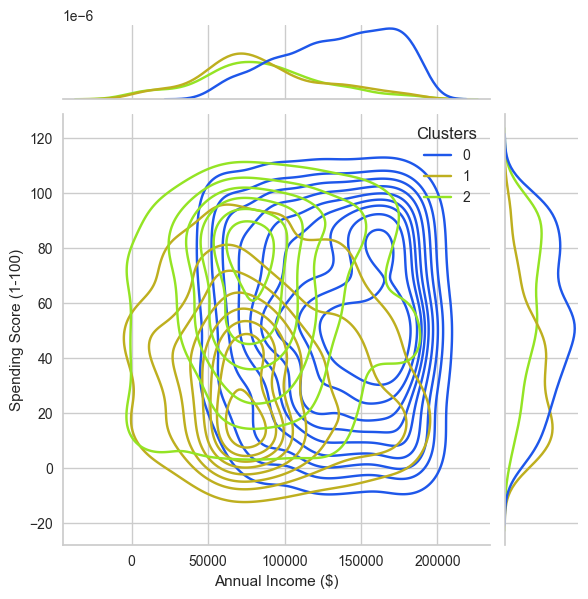

<Figure size 800x550 with 0 Axes>

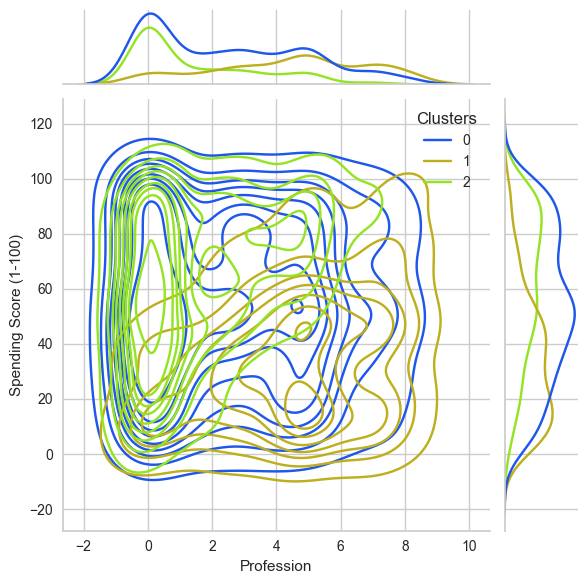

<Figure size 800x550 with 0 Axes>

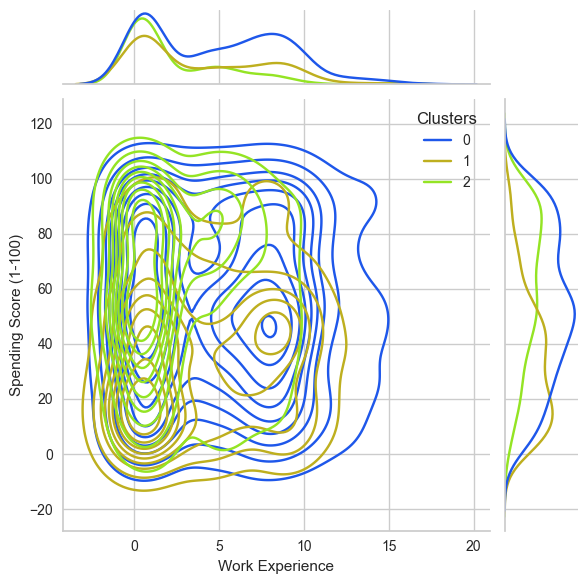

<Figure size 800x550 with 0 Axes>

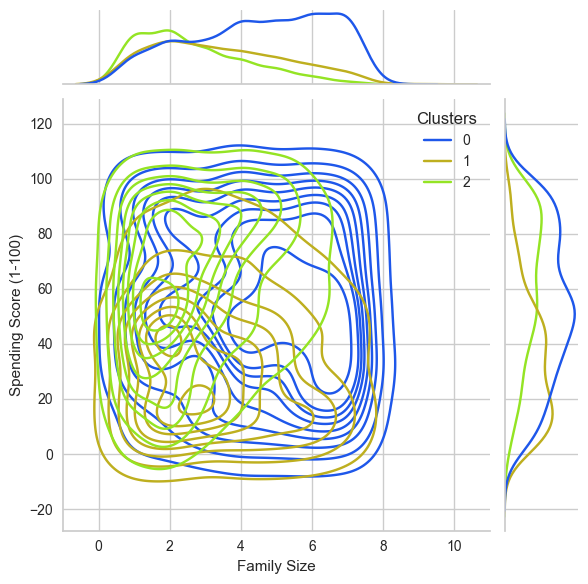

In [112]:
Personal = data.drop(['Clusters', 'Spending Score (1-100)'], axis=1).columns
for i in Personal:
    plt.figure()
    sns.jointplot(x=data[i], y=data["Spending Score (1-100)"], hue =data["Clusters"], kind="kde", palette=pal)
    plt.show()

## Conclusion

As we can see, no true cluster was formed. I believe this because the data may not be accurate. Hopefully, it will be a positive learning experience for me.